# Preprocessing 04 - Skill Score - Notebook for calculating the experience score for the participants and set up the meta data in a useful format

## Import Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy

# Read in Questionnaire Data

In [2]:
df_questionnaire = pd.read_excel("./data/Questionnaire.xlsx", sheet_name="Experience")
# transpose the dataframe
df_questionnaire = df_questionnaire.transpose()
# use first row as column names
df_questionnaire.columns = df_questionnaire.iloc[0]
#delete first row
df_questionnaire = df_questionnaire.drop(df_questionnaire.index[0])
#drop row where years of programming is missing
df_questionnaire = df_questionnaire.dropna(subset=["yearsAtWork"])
#change all NaN to 0
df_questionnaire = df_questionnaire.fillna(0)

# drop row with "Participant" being 9
df_questionnaire = df_questionnaire.drop(9)

df_questionnaire["yearsOfProgramming"] = df_questionnaire["yearsOfProgramming"].astype(float)
df_questionnaire["yearsOfJava"] = df_questionnaire["yearsOfJava"].apply(lambda x: float(str(x).replace(",", ".")))

## Check Correlation Effects

In [3]:
# calculate the pearson correlation between the years of programming and the years of java
corr = df_questionnaire.corr(method="pearson")
corr

Frage\Participant:,yearsOfProgramming,yearsOfProfessionalProgramming,yearsOfJava,logicalExperience,functionalExperience,imperativExperience,objectExperience,comparedToStudent,comparedToProfessional
Frage\Participant:,,,,,,,,,
yearsOfProgramming,1.000000,0.912879,0.834671,0.196881,0.277054,0.298009,0.405389,-0.155277,0.222305
yearsOfProfessionalProgramming,0.912879,1.000000,0.755738,0.162842,0.153438,0.211286,0.451542,-0.067585,0.287723
yearsOfJava,0.834671,0.755738,1.000000,0.107167,0.313488,0.186688,0.348047,-0.123541,0.267995
logicalExperience,0.196881,0.162842,0.107167,1.000000,0.438185,0.364237,0.112319,0.161150,0.299794
functionalExperience,0.277054,0.153438,0.313488,0.438185,1.000000,0.311776,0.099272,0.019113,0.308248
imperativExperience,0.298009,0.211286,0.186688,0.364237,0.311776,1.000000,0.393788,-0.083585,0.211158
objectExperience,0.405389,0.451542,0.348047,0.112319,0.099272,0.393788,1.000000,0.078476,0.393626
comparedToStudent,-0.155277,-0.067585,-0.123541,0.161150,0.019113,-0.083585,0.078476,1.000000,0.496090
comparedToProfessional,0.222305,0.287723,0.267995,0.299794,0.308248,0.211158,0.393626,0.496090,1.000000


## Calculate Skill Level

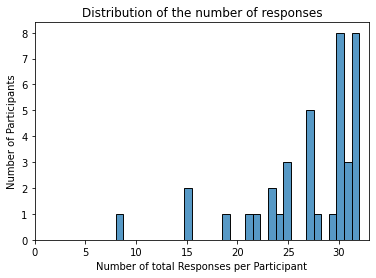

,Subpart,StartTime,EndTime,Eyetracking,EEG,CrossEEG,SumCorrect,Total,SumDurationInMinutes,SkillScore
Participant,,,,,,,,,,
1,Code,0.0,12.390280,./data/filteredData/Participant01/IsPrimecode_...,./data/filteredData/Participant01/IsPrimecode_...,./data/filteredData/Participant01/IsPrimecross...,22,32,3983.279641,0.331385
2,Code,0.0,40.635115,./data/filteredData/Participant02/HeightOfTree...,./data/filteredData/Participant02/HeightOfTree...,./data/filteredData/Participant02/HeightOfTree...,26,32,4114.059902,0.379187
3,Code,0.0,92.877823,./data/filteredData/Participant03/SiebDesErato...,./data/filteredData/Participant03/SiebDesErato...,./data/filteredData/Participant03/SiebDesErato...,13,15,2505.910764,0.311264
4,Code,0.0,94.990470,./data/filteredData/Participant04/HIndexcode_e...,./data/filteredData/Participant04/HIndexcode_e...,./data/filteredData/Participant04/HIndexcross_...,28,32,3955.479718,0.424727
5,Code,0.0,109.680191,./data/filteredData/Participant05/SiebDesErato...,./data/filteredData/Participant05/SiebDesErato...,./data/filteredData/Participant05/SiebDesErato...,20,32,3833.480571,0.313031
6,Code,0.0,28.998734,./data/filteredData/Participant06/RemoveDouble...,./data/filteredData/Participant06/RemoveDouble...,./data/filteredData/Participant06/RemoveDouble...,21,28,3988.194175,0.315932
7,Code,0.0,28.138863,./data/filteredData/Participant07/InsertSortco...,./data/filteredData/Participant07/InsertSortco...,./data/filteredData/Participant07/InsertSortcr...,28,31,3991.702411,0.420873
10,Code,0.0,31.310999,./data/filteredData/Participant10/ContainsSubs...,./data/filteredData/Participant10/ContainsSubs...,./data/filteredData/Participant10/ContainsSubs...,20,30,3424.733665,0.350392
11,Code,0.0,51.498158,./data/filteredData/Participant11/DumpSortingc...,./data/filteredData/Participant11/DumpSortingc...,./data/filteredData/Participant11/DumpSortingc...,12,19,4040.273653,0.178206


,StartTime,EndTime,SumCorrect,Total,SumDurationInMinutes,SkillScore
count,37.0,37.000000,37.000000,37.000000,37.000000,37.000000
mean,0.0,56.987013,20.729730,27.513514,3922.607475,0.325230
std,0.0,49.216489,5.107993,4.658455,527.793165,0.102510
min,0.0,10.538237,10.000000,15.000000,2466.782760,0.142520
25%,0.0,24.274830,17.000000,25.000000,3954.307315,0.259896
50%,0.0,36.052612,21.000000,30.000000,4122.392179,0.315932
75%,0.0,70.163245,24.000000,31.000000,4217.962996,0.379187
max,0.0,180.050434,29.000000,32.000000,4628.015541,0.656726


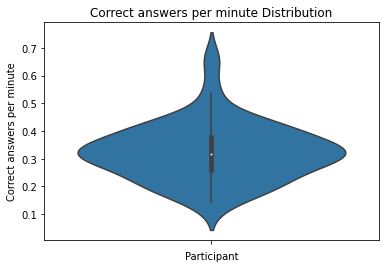

ShapiroResult(statistic=0.9470058083534241, pvalue=0.07728617638349533)

In [4]:
# read in the dataframe for the skill level
df_behavioral = pd.read_csv("./data/filteredData/filtered_data.csv")

# drop unnamed column
df_behavioral = df_behavioral[df_behavioral["Subpart"] == "Code"]

# Map Answer to Right or Wrong
df_behavioral["Behavioral"] = df_behavioral["Behavioral"].apply(lambda x: "Right" if x == "Right" else "Wrong")

# Calculate the duration
df_behavioral["Duration"] = df_behavioral["EndTime"] - df_behavioral["StartTime"]

# get 0.05 and 0.95 quantiles for outlier
lowest = df_behavioral["Duration"].quantile(0.05)
highest = df_behavioral["Duration"].quantile(0.95)

# kick out all rows where the duration is not in the 5% quantile range and when the value is lower than 5% and the answer is right, keep the row
df_behavioral["IsOutlier"] = True
df_behavioral.loc[((df_behavioral["Duration"] > lowest) & (df_behavioral["Duration"] < highest)) | (df_behavioral["Duration"] <= lowest) & (df_behavioral["Behavioral"] == "Right"), "IsOutlier"] = False

# Count The Number Of Outliers
df_tmp = df_behavioral.groupby("Participant")\
    .apply(lambda df: len(df[df["IsOutlier"] == False]))\
    .to_frame("Count")
df_tmp = df_tmp[df_tmp["Count"] != 0]

# create a histogram of the duration of the snippets
g = sns.histplot(df_tmp["Count"], bins=32, label="Participants")
g.set_xlabel("Number of total Responses per Participant")
g.set_ylabel("Number of Participants")
g.set_title("Distribution of the number of responses")
g.set_xlim(0, 33)
plt.show()

# Set number 46 to be an outlier (manual see paper)
df_behavioral.loc[df_behavioral["Participant"] == 46, "IsOutlier"] = True
df_behavioral = df_behavioral[df_behavioral["Participant"] != 46]
df_behavioral = df_behavioral.set_index("Participant", drop=True)

# Calculate the Sum of correct answers per participant
df_behavioral["SumCorrect"] = df_behavioral.groupby("Participant")\
    .apply(lambda df: df[df["IsOutlier"] == False])\
    .groupby("Participant")\
    .apply(lambda df: len(df[df["Behavioral"] == "Right"]))

# Calculate the Sum of total answers per participant
df_behavioral["Total"] = df_behavioral.groupby("Participant")\
    .apply(lambda df: len(df[df["IsOutlier"] == False]))

# Calculate the Duration a Participant took at a task
df_behavioral["SumDurationInMinutes"] = pd.read_csv("./data/filteredData/filtered_data.csv")\
    .groupby("Participant")\
    .apply(lambda df: df["EndTime"].array[-1] - df["StartTime"].array[0])

# Skill_Score = correct answers per minute
df_behavioral["SkillScore"] = df_behavioral["SumCorrect"] / (df_behavioral["SumDurationInMinutes"] / 60.0)

#display(df_behavioral[~df_behavioral.index.duplicated(keep='first')]["SumDurationInMinutes"])

# Clean up df df_skill
df_skill = df_behavioral[~df_behavioral.index.duplicated(keep='first')]
df_skill = df_skill.drop(columns=["Algorithm", "Behavioral", "Duration", "IsOutlier"])

# Display the skill score
display(df_skill)

# Display the skill score description
display(df_skill.describe())

# generate violin plot of skill score
g = sns.violinplot(y="SkillScore", data=df_skill, inner="box")
g.set_xlabel("Participant")
g.set_ylabel("Correct answers per minute")
g.set_title("Correct answers per minute Distribution")
plt.show()

# check if correct_per_time is normal distributed with shapiro-wilk test
display(scipy.stats.shapiro(df_skill["SkillScore"]))

# save the dataframe to csv
df_behavioral.to_csv("./data/filteredData/filtered_data.csv")

In [5]:
df_behavioral

,Algorithm,Subpart,Behavioral,StartTime,EndTime,Eyetracking,EEG,CrossEEG,Duration,IsOutlier,SumCorrect,Total,SumDurationInMinutes,SkillScore
Participant,,,,,,,,,,,,,,
1,IsPrime,Code,Right,0.000000,12.390280,./data/filteredData/Participant01/IsPrimecode_...,./data/filteredData/Participant01/IsPrimecode_...,./data/filteredData/Participant01/IsPrimecross...,12.390280,False,22,32,3983.279641,0.331385
1,SiebDesEratosthenes,Code,Wrong,49.778238,202.350152,./data/filteredData/Participant01/SiebDesErato...,./data/filteredData/Participant01/SiebDesErato...,./data/filteredData/Participant01/SiebDesErato...,152.571914,False,22,32,3983.279641,0.331385
1,IsAnagram,Code,Right,254.122970,363.738694,./data/filteredData/Participant01/IsAnagramcod...,./data/filteredData/Participant01/IsAnagramcod...,./data/filteredData/Participant01/IsAnagramcro...,109.615724,False,22,32,3983.279641,0.331385
1,RemoveDoubleChar,Code,Right,401.629505,455.085781,./data/filteredData/Participant01/RemoveDouble...,./data/filteredData/Participant01/RemoveDouble...,./data/filteredData/Participant01/RemoveDouble...,53.456276,False,22,32,3983.279641,0.331385
1,BinToDecimal,Code,Right,555.252914,605.175005,./data/filteredData/Participant01/BinToDecimal...,./data/filteredData/Participant01/BinToDecimal...,./data/filteredData/Participant01/BinToDecimal...,49.922091,False,22,32,3983.279641,0.331385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,DumpSorting,Code,Wrong,2913.891198,3027.260143,./data/filteredData/Participant71/DumpSortingc...,./data/filteredData/Participant71/DumpSortingc...,./data/filteredData/Participant71/DumpSortingc...,113.368945,False,25,31,3443.124016,0.435651
71,BinomialCoefficient,Code,Right,3138.411363,3189.049224,./data/filteredData/Participant71/BinomialCoef...,./data/filteredData/Participant71/BinomialCoef...,./data/filteredData/Participant71/BinomialCoef...,50.637861,False,25,31,3443.124016,0.435651
71,IsAnagram,Code,Right,3227.575716,3338.571470,./data/filteredData/Participant71/IsAnagramcod...,./data/filteredData/Participant71/IsAnagramcod...,./data/filteredData/Participant71/IsAnagramcro...,110.995754,False,25,31,3443.124016,0.435651
